In [19]:
import numpy as np
from scipy import special
import pandas as pd
from matplotlib import pyplot as plt

In [195]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [196]:
muF = 0.154
temps = 8.617e-8  * np.array([10, 10000, 100000])
labels = ['$10^3$', '$10^4$', '$10^5$']

cols = ['#f0bc02','#00aa83' ,'#006a9c']

linsty = ['-', '--', ':']

def init_FD(E, T):
    return special.expit(-(E - muF) / T)

def final_FD(E,T):
    return 1 - special.expit(-(E + 0.01*muF - muF)/T)


def make_plot():
    
    domain = np.linspace(0.1, 0.2, 100)
    
        
    fig, ax1 = plt.subplots(figsize = (4.5, 12.5/5), dpi = 300)
    for i in range(len(temps)):
        ax1.plot(domain, init_FD(domain, temps[i])*final_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i], label = labels[i])
#         ax1.plot(domain, final_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i])
        
    ax1.grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax1.legend(loc = 'upper right', shadow = False).set_title(title = 'T [K]', prop={"size": 5})
    ax1.set_xlabel('$E$ [GeV]')
    ax1.set_ylabel('$f(E)$')
    plt.savefig('overlap.pdf')
    plt.show()

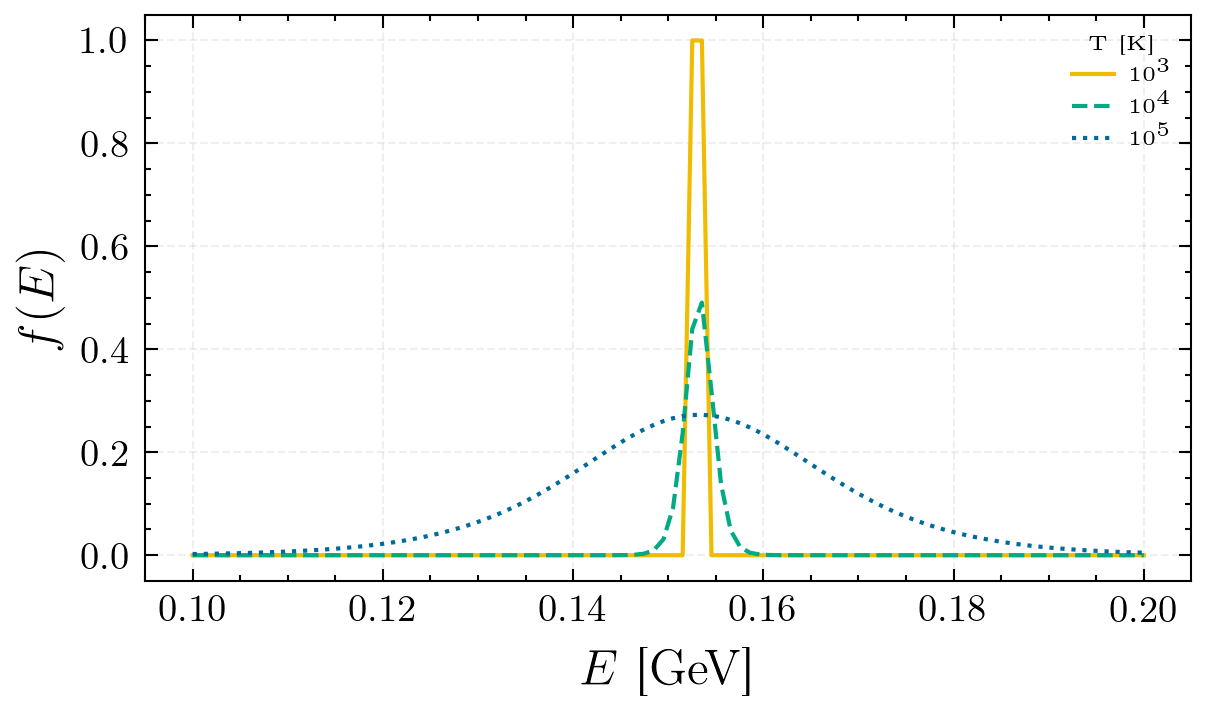

In [197]:
make_plot()